# Library Import

In [1]:
import sys
import pathlib
sys.path.append(str(pathlib.Path().resolve().parent))

#-- Basics Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os 

#-- Warnings OFF
from warnings import simplefilter

#-- Autocorrelação
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
#from dateutil.parser import parse

#-- Scaler
from sklearn.preprocessing import MinMaxScaler

from utils import *

IMAGE_PATH = '../Figure/EDA/'

simplefilter("ignore", FutureWarning)
np.seterr(all="ignore")

%matplotlib inline

# Function definition

In [2]:
camargos = df_transform('../Datasets/Raw/Rio 01 Camargos.txt',
                        'Camargos')

furnas = df_transform('../Datasets/Raw/Rio 02 Furnas.txt',
                        'Furnas')

In [3]:
camargos.head()

,variable,value,year,date,name
0,01,178,1931,1931-01-01,Camargos
1,02,371,1931,1931-02-01,Camargos
2,03,326,1931,1931-03-01,Camargos
3,04,479,1931,1931-04-01,Camargos
4,05,332,1931,1931-05-01,Camargos


In [4]:
furnas.head()

,variable,value,year,date,name
0,01,1476,1931,1931-01-01,Furnas
1,02,2964,1931,1931-02-01,Furnas
2,03,2167,1931,1931-03-01,Furnas
3,04,1585,1931,1931-04-01,Furnas
4,05,1254,1931,1931-05-01,Furnas


In [5]:
df = camargos[['date','value']]
df.columns = ['date','Camargos']
df['date'] = pd.to_datetime(df['date'])
df['Furnas'] = furnas['value']
df.index = df['date']
df.head()

/var/folders/6k/1ytcj9fd6y16pyl9dn8rn_nh0000gn/T/ipykernel_10427/2866231439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/6k/1ytcj9fd6y16pyl9dn8rn_nh0000gn/T/ipykernel_10427/2866231439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnas'] = furnas['value']


,date,Camargos,Furnas
date,,,
1931-01-01,1931-01-01,178,1476
1931-02-01,1931-02-01,371,2964
1931-03-01,1931-03-01,326,2167
1931-04-01,1931-04-01,479,1585
1931-05-01,1931-05-01,332,1254


In [6]:
scaler = MinMaxScaler()
df[['Camargos_norm', 'Furnas_norm']] = scaler.fit_transform(df[['Camargos', 'Furnas']])
df.head()

/var/folders/6k/1ytcj9fd6y16pyl9dn8rn_nh0000gn/T/ipykernel_10427/3277995498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Camargos_norm', 'Furnas_norm']] = scaler.fit_transform(df[['Camargos', 'Furnas']])


,date,Camargos,Furnas,Camargos_norm,Furnas_norm
date,,,,,
1931-01-01,1931-01-01,178,1476,0.265683,0.358007
1931-02-01,1931-02-01,371,2964,0.621771,0.776808
1931-03-01,1931-03-01,326,2167,0.538745,0.552491
1931-04-01,1931-04-01,479,1585,0.821033,0.388686
1931-05-01,1931-05-01,332,1254,0.549815,0.295525


# Dados históricos

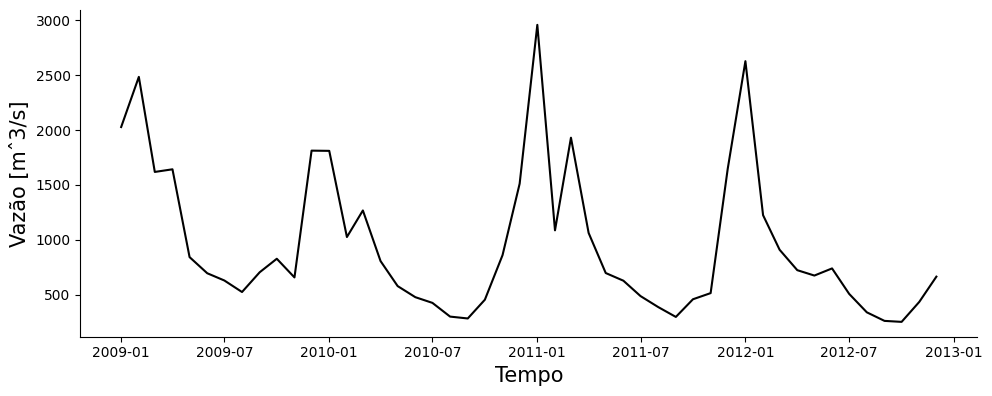

In [7]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df[df.date >= '2009-01-01'],x='date',y='Furnas', color = 'k')
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('Vazão [mˆ3/s]', size=15)
plt.xlabel('Tempo', size=15)
plt.savefig(f'{IMAGE_PATH}Camargos Flow River Time Series.png', format='png')
plt.show()


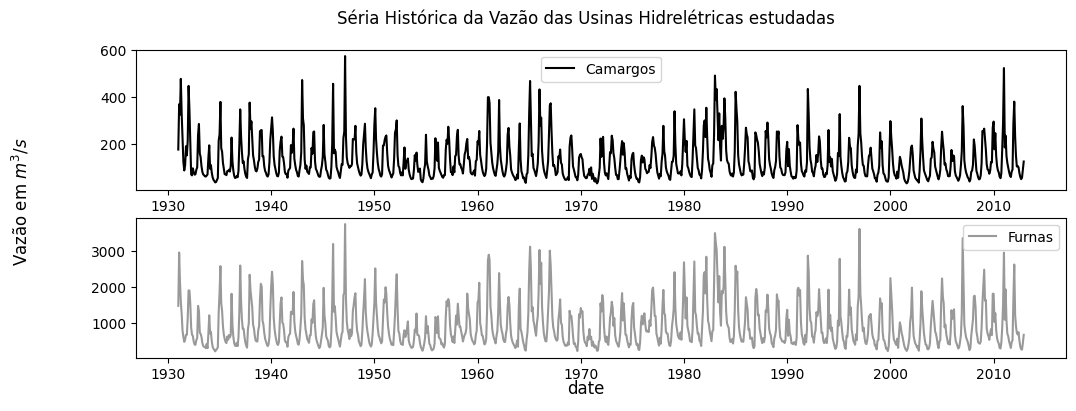

In [8]:
figure, axes = plt.subplots(2, 1, figsize=(12,4))
figure.suptitle(f'Séria Histórica da Vazão das Usinas Hidrelétricas estudadas')
figure.supylabel('Vazão em $m^3/s$')
figure.supxlabel('date')
fig0 = sns.lineplot(ax=axes[0],data=df,x='date',y='Camargos', color = 'k', label="Camargos")


fig1 = sns.lineplot(ax=axes[1],data=df,x='date',y='Furnas', color = '#999', label="Furnas")

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_xlabel(' ')
axes[1].set_xlabel(' ')

plt.legend()
plt.savefig(f'{IMAGE_PATH}Série histórica.png', format='png')
plt.show()

  


In [9]:
df['cohort'] = df['date'].apply(lambda x: cohort_type(x,model_type='escalar'))

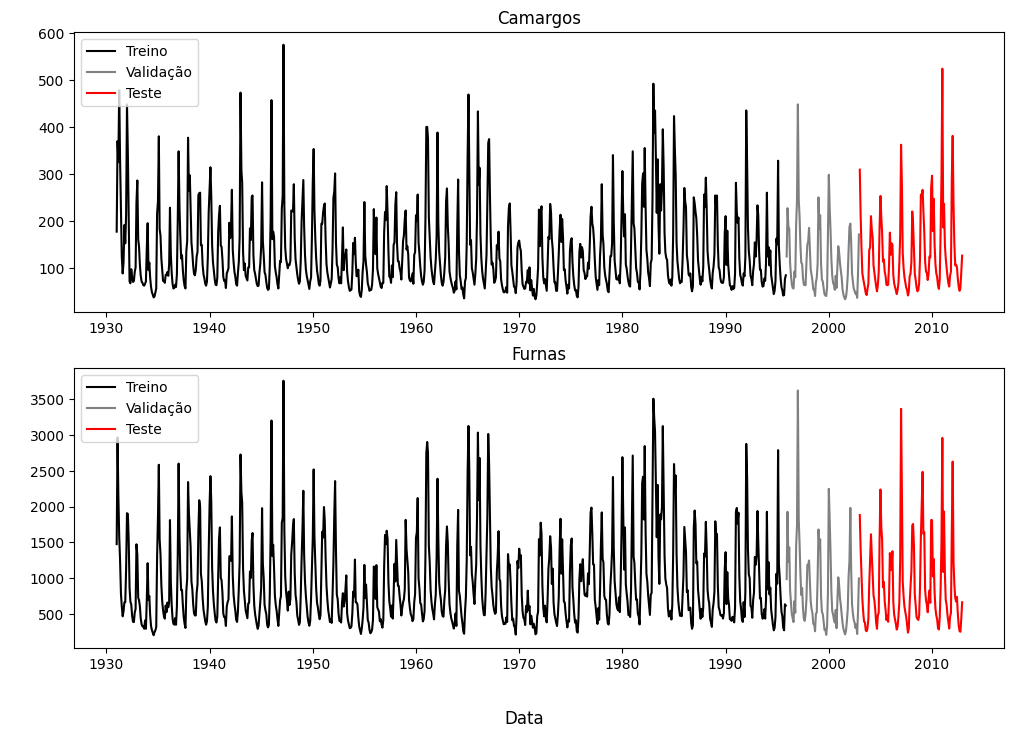

In [10]:
figure, axes = plt.subplots(2, 1, figsize=(12,8))

figure.supxlabel('Data')

fig0 = sns.lineplot(ax=axes[0],data=df[df['cohort'] == '1. train'],x='date',y='Camargos', color = 'k', label='Treino')
fig0 = sns.lineplot(ax=axes[0],data=df[df['cohort'] == '2. validation'],x='date',y='Camargos', color = 'gray', label="Validação")
fig0 = sns.lineplot(ax=axes[0],data=df[df['cohort'] == '3. test'],x='date',y='Camargos', color = 'r', label="Teste")

fig1 = sns.lineplot(ax=axes[1],data=df[df['cohort'] == '1. train'],x='date',y='Furnas', color = 'k', label='Treino')
fig1 = sns.lineplot(ax=axes[1],data=df[df['cohort'] == '2. validation'],x='date',y='Furnas', color = 'gray', label="Validação")
fig1 = sns.lineplot(ax=axes[1],data=df[df['cohort'] == '3. test'],x='date',y='Furnas', color = 'r', label="Teste")

axes[0].set_title('Camargos')
axes[1].set_title('Furnas')

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_xlabel(' ')
axes[1].set_xlabel(' ')

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

plt.savefig(f'{IMAGE_PATH}Divisão Treino-Validação-Teste.png', format='png')
plt.show()

  


# Correlação - Simples

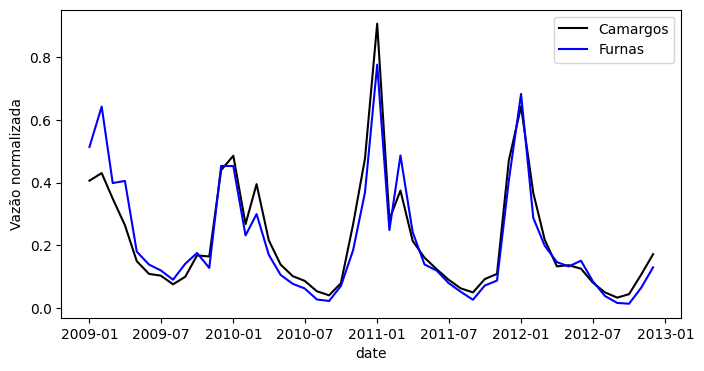

In [11]:
figure, axes = plt.subplots(1, 1, figsize=(8,4))

fig0 = sns.lineplot(data=df[df.date >= '2009-01-01'],x='date',y='Camargos_norm', color = 'k',linestyle='-', label="Camargos")
fig1 = sns.lineplot(data=df[df.date >= '2009-01-01'],x='date',y='Furnas_norm', color = 'b', linestyle='-', label="Furnas")
plt.legend()
plt.ylabel('Vazão normalizada')
plt.savefig(f'{IMAGE_PATH}Dados normalizados.png', format='png')
plt.show()


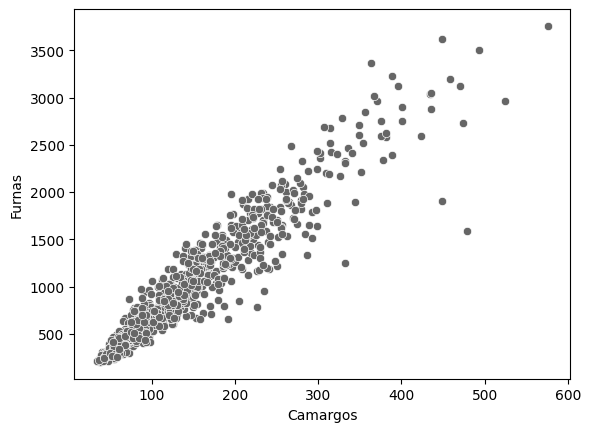

In [12]:
plt.figure()
sns.scatterplot(data=df,x='Camargos',y='Furnas', color = '#666666')
plt.savefig(f'{IMAGE_PATH}Dispersão histórica.png', format='png')
plt.show()

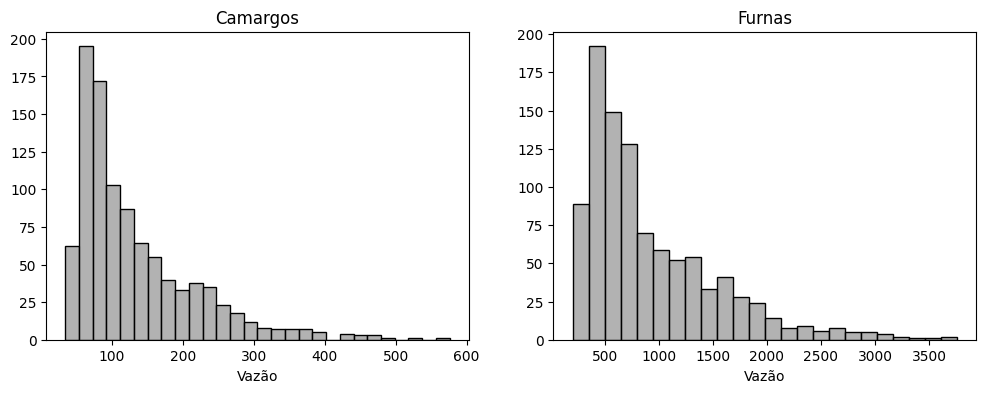

In [13]:
figure, axes = plt.subplots(1, 2, figsize=(12,4))
fig0 = sns.histplot(ax=axes[0],data=df,x='Camargos', color = '#999', label="Camargos")
fig1 = sns.histplot(ax=axes[1],data=df,x='Furnas', color = '#999', label="Furnas")

axes[1].set_title('Furnas')
axes[0].set_title('Camargos')

axes[0].set_ylabel('')
axes[1].set_ylabel('')


axes[0].set_xlabel('Vazão')
axes[1].set_xlabel('Vazão')
plt.savefig(f'{IMAGE_PATH}Distribuição Séries.png', format='png')
plt.show()

  


In [14]:
df.describe(percentiles=[0.1,0.8,0.9,0.99])

,date,Camargos,Furnas,Camargos_norm,Furnas_norm
count,984,984.000000,984.000000,984.000000,984.000000
mean,1971-12-16 10:58:32.195121952,132.963415,926.026423,0.182589,0.203216
min,1931-01-01 00:00:00,34.000000,204.000000,0.000000,0.000000
10%,1939-03-10 07:12:00,58.000000,362.000000,0.044280,0.044469
50%,1971-12-16 12:00:00,102.500000,705.000000,0.126384,0.141008
80%,1996-07-13 09:36:00.000000256,194.400000,1364.400000,0.295941,0.326597
90%,2004-09-22 00:00:00.000000128,249.400000,1809.500000,0.397417,0.451872
99%,2012-02-05 22:19:12,436.000000,3017.230000,0.741697,0.791790
max,2012-12-01 00:00:00,576.000000,3757.000000,1.000000,1.000000
std,NaN,84.746986,615.739071,0.156360,0.173301


In [16]:
# df.corr()

# Autocorrelação

In [17]:
time_point = '2000-01-01'
period = 12

## Camargos

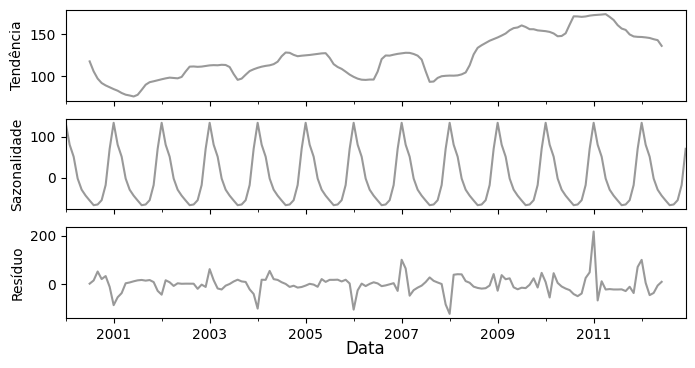

In [26]:
result=seasonal_decompose(df[df['date'] >= time_point]['Camargos'], model='aditive', period=period)

fig, axes = plt.subplots(3, 1,figsize=(8,4), sharex=True)

result.trend.plot(ax=axes[0], legend=False, color='#999')
axes[0].set_ylabel('Tendência')
result.seasonal.plot(ax=axes[1], legend=False, color='#999')
axes[1].set_ylabel('Sazonalidade')
result.resid.plot(ax=axes[2], legend=False, color='#999')
axes[2].set_ylabel('Resíduo')
axes[2].set_xlabel('')

fig.supxlabel('Data')
plt.savefig(f'{IMAGE_PATH}Components Time Series - Camargos.png', format='png')
plt.show()

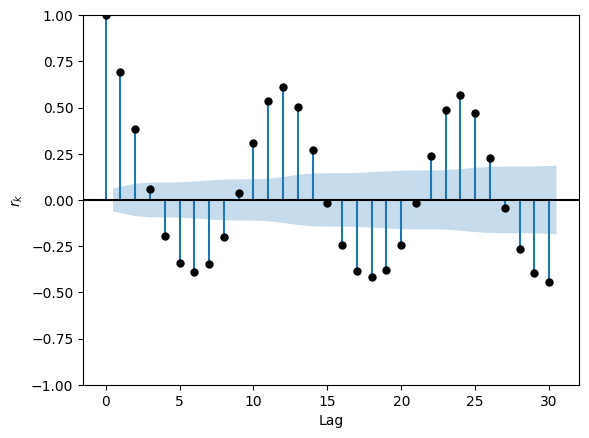

In [27]:
plot_acf(x=df['Camargos'], lags=30, color= 'k')
plt.ylabel(f'$r_k$')
plt.xlabel('Lag')
plt.title('')
plt.savefig(f'{IMAGE_PATH}Autocorrelation - Camargos.png', format='png')
plt.show()

## Furnas

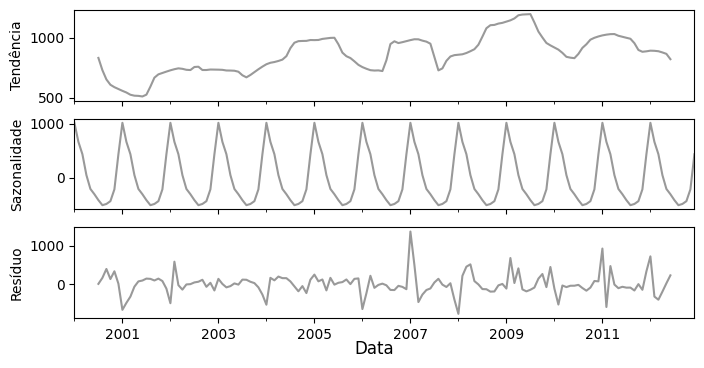

In [28]:
result=seasonal_decompose(df[df['date'] >= time_point]['Furnas'], model='aditive', period=period)

fig, axes = plt.subplots(3, 1,figsize=(8,4), sharex=True)

result.trend.plot(ax=axes[0], legend=False, color='#999')
axes[0].set_ylabel('Tendência')
result.seasonal.plot(ax=axes[1], legend=False, color='#999')
axes[1].set_ylabel('Sazonalidade')
result.resid.plot(ax=axes[2], legend=False, color='#999')
axes[2].set_ylabel('Resíduo')
axes[2].set_xlabel('')

fig.supxlabel('Data')
plt.savefig(f'{IMAGE_PATH}Components Time Series - Furnas.png', format='png')
plt.show()

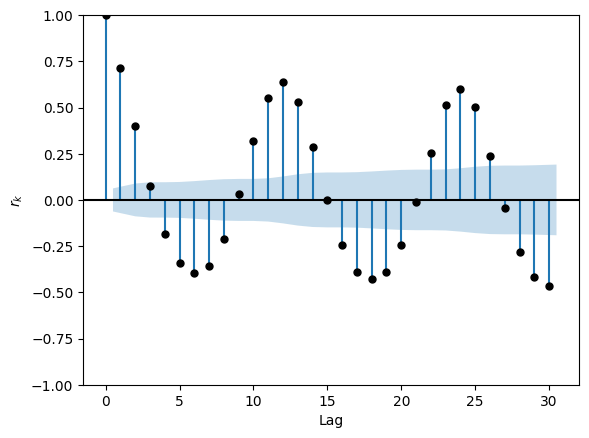

In [29]:
plot_acf(x=df['Furnas'], lags=30, color= 'k')
plt.ylabel(f'$r_k$')
plt.xlabel('Lag')
plt.title('')
plt.savefig(f'{IMAGE_PATH}Autocorrelation - Furnas.png', format='png')
plt.show()

# Hurst

In [30]:
def Hurst(obj_sample, name):
  # Hurst Expoent calculation
  Size_final = []
  RS_final = []
  size_max = len(obj_sample)
  i = 1
  while True:
    middle_process = []
    for obj_sample_sized in np.array_split(obj_sample, i,):
      actual_size = len(obj_sample_sized)
      mean = obj_sample_sized.mean()
      std = obj_sample_sized.std()
      Vk = (obj_sample_sized - mean).cumsum()
      range = Vk.max() - Vk.min()
      RS = range/std
      middle_process.append(RS)

    Size_final.append(len(Vk))
    RS_final.append(np.array(middle_process).mean())
    i = i*2
    if actual_size < 8:
      break

  X_final = np.log10(Size_final)
  Y_final = np.log10(RS_final)
  z = np.polyfit(X_final, Y_final, 1)

  print(f'Coeficiente de Hurst = {round(z[0],4)}')
  plt.scatter(X_final,Y_final, label='Pontos calculados',marker = 'x',c='red')
  plt.plot(X_final,z[0]*X_final + z[1],label='Regressão',linestyle = '--',c='black')
  plt.xlabel('log2(N)')
  plt.ylabel('log2(R/S)')
  plt.legend()
  plt.savefig(f'{IMAGE_PATH}hurst_calc_{name}.png', format='png')

Coeficiente de Hurst = 0.572


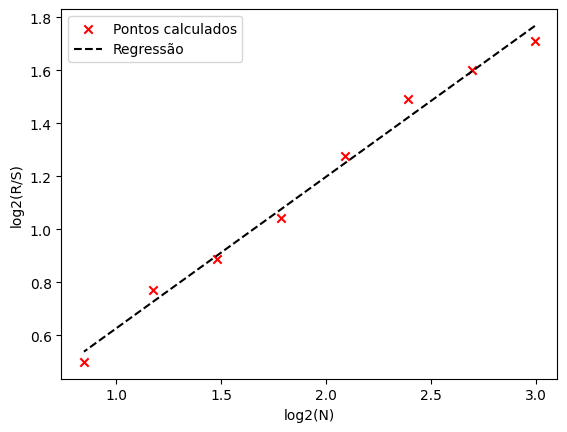

In [31]:
Hurst(df['Camargos_norm'].to_numpy(), name='Camargos')

Coeficiente de Hurst = 0.5843


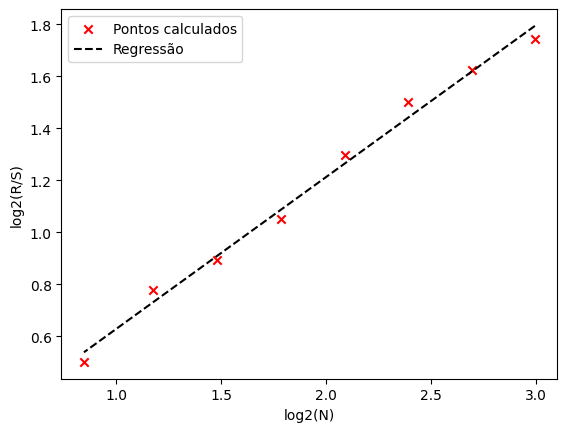

In [33]:
Hurst(df['Furnas_norm'].to_numpy(), name='Furnas')